In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [41]:
#PREPROCESSING
#Get images 

training_data_path = 'images/train'
testing_data_path = 'images/test'
validation_data_path = 'images/validation'

In [42]:
# fit images to the same size

image_height = 180
image_width = 180

In [43]:
# function to convert path to greyscaled dataset
def dataset_dir(data_path):
    return tf.keras.utils.image_dataset_from_directory(
        data_path,
        batch_size= 4,
        shuffle=True,
        color_mode= 'grayscale',
        image_size= (image_width, image_height),
        validation_split= False)


In [44]:
training_data = dataset_dir(training_data_path)

Found 231 files belonging to 3 classes.


In [45]:
categories = training_data.class_names
#print(categories)

In [46]:
testing_data = dataset_dir(testing_data_path)

Found 30 files belonging to 3 classes.


In [47]:
validation_data = dataset_dir(validation_data_path)

Found 36 files belonging to 3 classes.


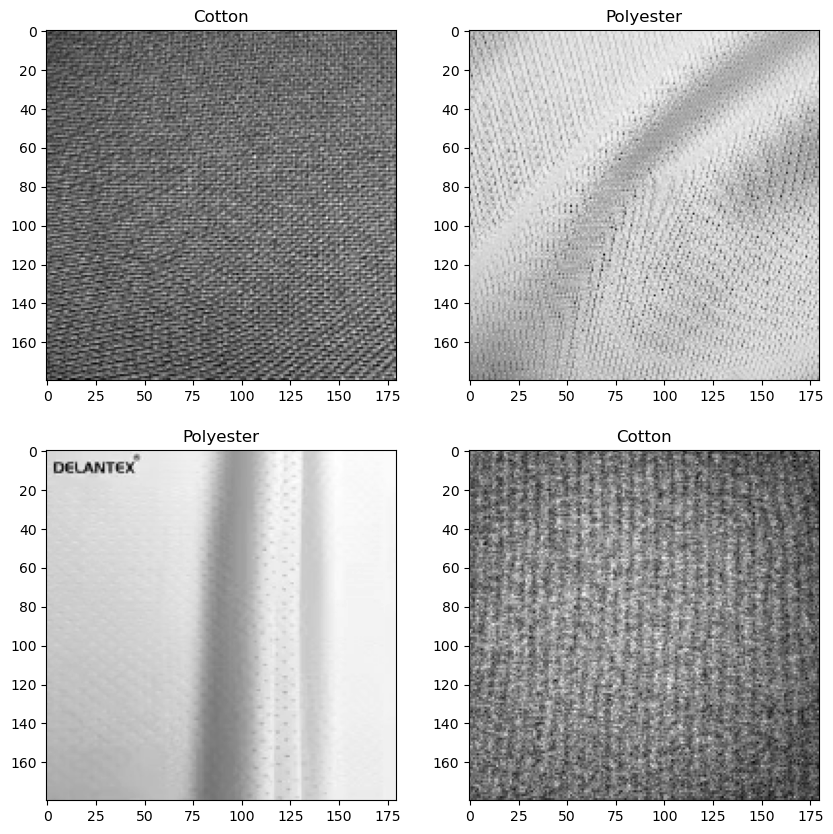

In [48]:
#Show image of each type

plt.figure(figsize=(10,10))
for training_data_point in training_data.take(1):
    images, cat = training_data_point
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i].numpy().astype('uint8'), cmap= 'gray')
        plt.title(categories[cat[i]])


In [52]:
# CREATING THE MODEL

from tensorflow.keras.models import Sequential


#standard sequntial model from tensorflow keras documentation
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(4)
    
])

In [53]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
# Fit the model with n epochs

epochs=25
history = model.fit(
    training_data, 
    validation_data=validation_data,
    epochs=epochs
)

Epoch 1/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3544 - loss: 1.4057 - val_accuracy: 0.5556 - val_loss: 0.9010
Epoch 2/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4200 - loss: 1.0471 - val_accuracy: 0.4444 - val_loss: 1.0406
Epoch 3/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5775 - loss: 1.0416 - val_accuracy: 0.5833 - val_loss: 0.8215
Epoch 4/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5840 - loss: 0.9687 - val_accuracy: 0.6111 - val_loss: 0.7700
Epoch 5/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5812 - loss: 0.8594 - val_accuracy: 0.6111 - val_loss: 0.9751
Epoch 6/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6221 - loss: 0.8681 - val_accuracy: 0.5556 - val_loss: 0.7685
Epoch 7/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6272 - loss: 0.8054 - val_accuracy: 0.5833 - val_loss: 0.7541
Epoch 8/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6541 - loss: 0.7507 - val_accuracy: 0.5556 - v

KeyboardInterrupt: 

In [ ]:
model.evaluate(testing_data)